**US** **Honey** **Consumption** **Analysis** **Case** **Study**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("US_honey_dataset.csv")
df

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...,...
1110,1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


**Data** **Cleaning**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                1115 non-null   object 
 1   colonies_number      1115 non-null   int64  
 2   yield_per_colony     1115 non-null   int64  
 3   production           1115 non-null   int64  
 4   stocks               1115 non-null   int64  
 5   average_price        1115 non-null   float64
 6   value_of_production  1115 non-null   int64  
 7   year                 1115 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 69.8+ KB


In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


In [10]:
df.isnull().sum()

,0
state,0
colonies_number,0
yield_per_colony,0
production,0
stocks,0
average_price,0
value_of_production,0
year,0


If null values are present either we should drop them or fill them with suitable values(mean/mode/median/0 etc)

In [11]:
#Checking duplicated values
df.duplicated().sum()

0

If in case of any duplicates are there:
df.drop_duplicates(inplace=True)

In [13]:
#Outliers(No need to remove. They can be removed mainly in ML and statistics part)
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

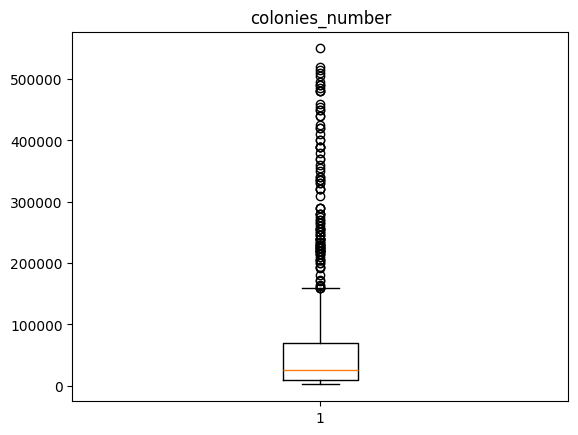

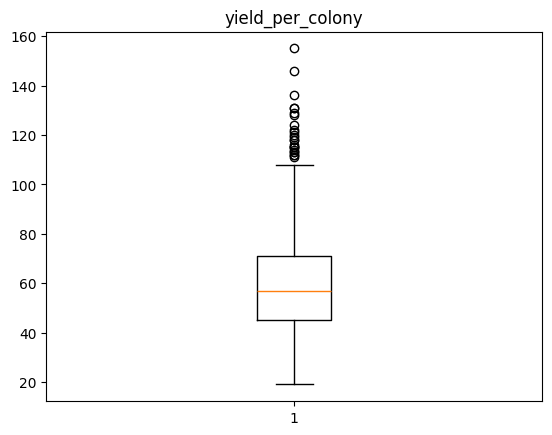

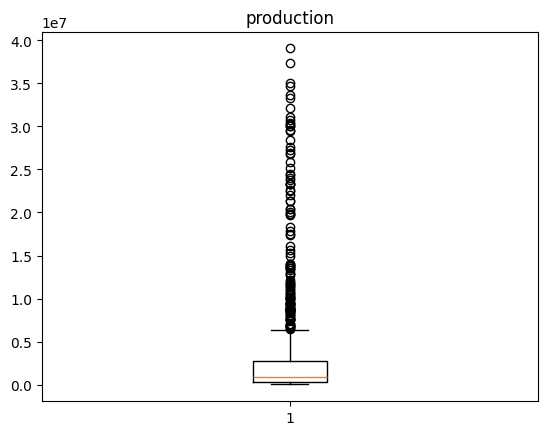

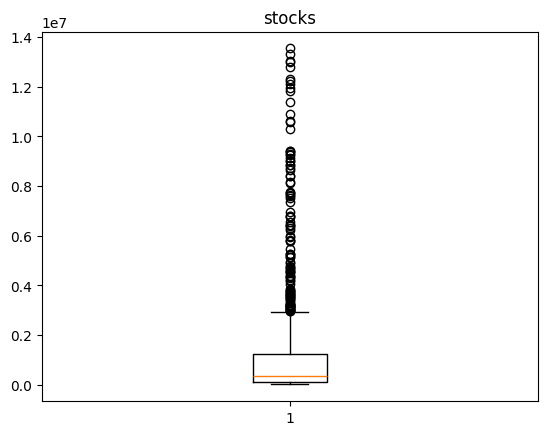

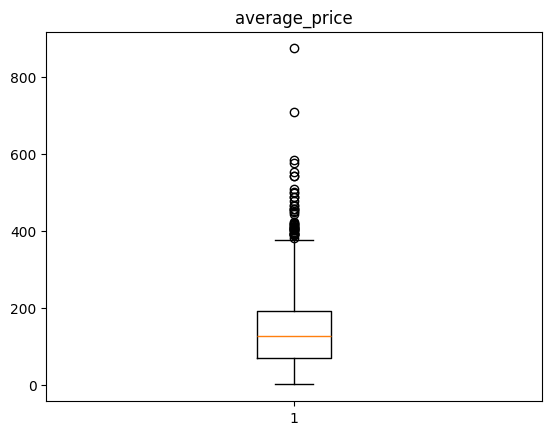

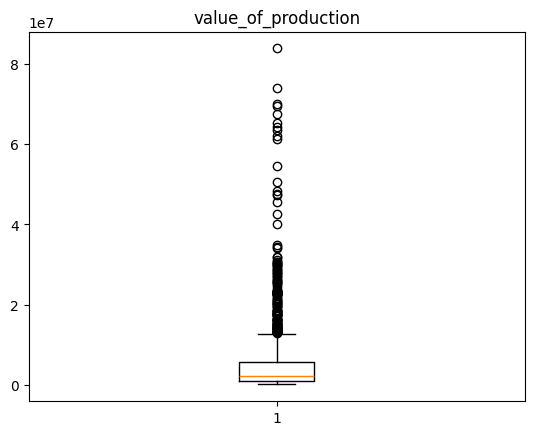

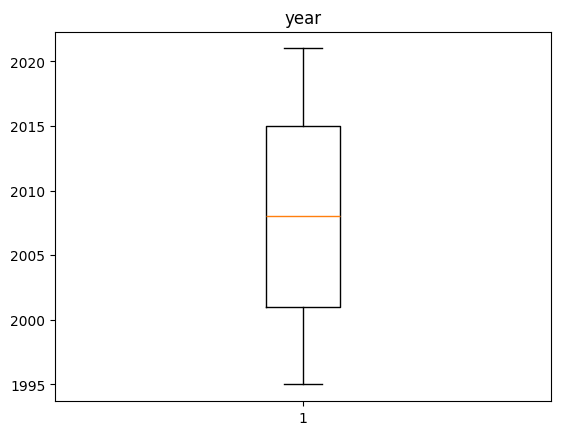

In [14]:
for col in df.columns:
  if df[col].dtype!='object':
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

**Data Visualization**

**Q1. Which states are rarely contributing for honey production since last 27 years?**

In [15]:
df['state'].value_counts()

,count
state,
Alabama,27
Missouri,27
Arizona,27
NewJersey,27
NewYork,27
NorthCarolina,27
NorthDakota,27
Ohio,27
Oregon,27


In [16]:
l = df['state'].value_counts().index
l

Index(['Alabama', 'Missouri', 'Arizona', 'NewJersey', 'NewYork',
       'NorthCarolina', 'NorthDakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'SouthDakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'WestVirginia', 'Wisconsin', 'Montana', 'Nebraska',
       'Mississippi', 'Minnesota', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Louisiana', 'Maine', 'Michigan', 'Wyoming', 'Kentucky',
       'NewMexico', 'Nevada', 'SouthCarolina', 'Oklahoma', 'Maryland'],
      dtype='object', name='state')

In [17]:
val = df['state'].value_counts().values
val

array([27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 26, 18, 15, 12,  9,  9])

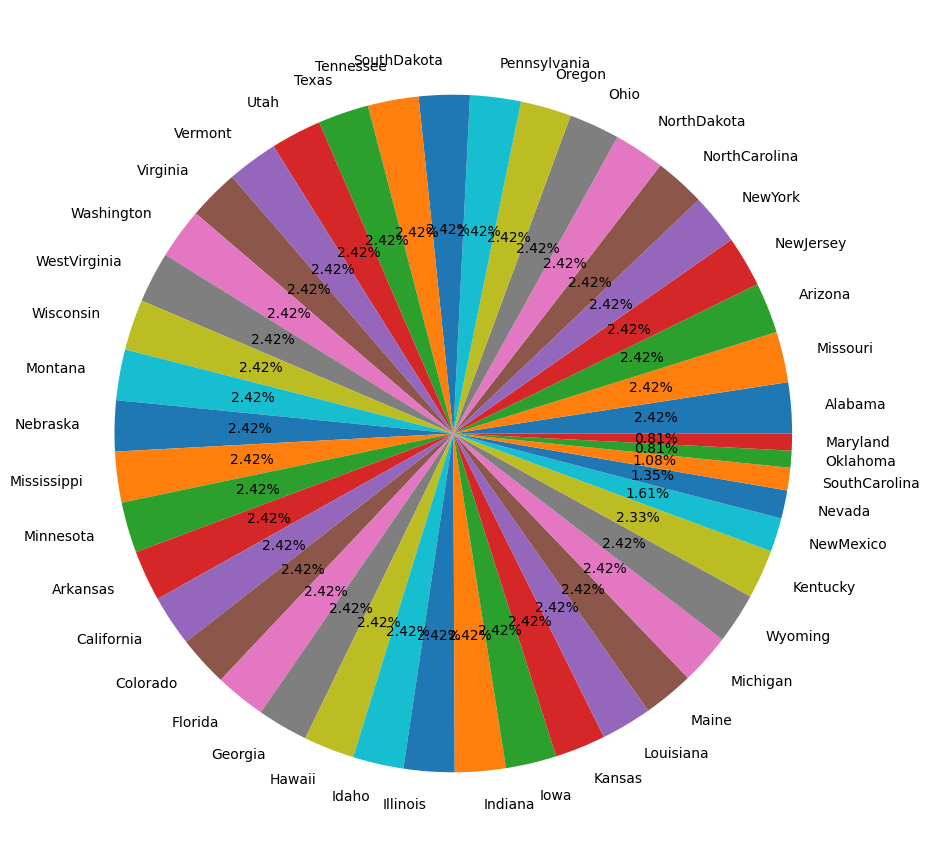

In [18]:
plt.figure(figsize=(16,11))
plt.pie(x=val,labels=l,autopct='%0.2f%%')
plt.show()

**Inferences**:
NewMexico, Nevada, SouthCarolina, Oklahoma, Maryland are the least contributing states for honey production since last 27 years.

**Q2. Which are the top 5 Honey producing states?(Total production since 1995)**

In [25]:
new_df = df.groupby('state').sum()['production'].reset_index()

In [26]:
new_df = new_df.sort_values(by='production',ascending=False)
new_df

,state,production
28,NorthDakota,513742000
3,California,423876000
34,SouthDakota,355726000
5,Florida,280934000
21,Montana,197173000
18,Minnesota,176581000
36,Texas,129441000
17,Michigan,101063000
42,Wisconsin,99909000
8,Idaho,87188000


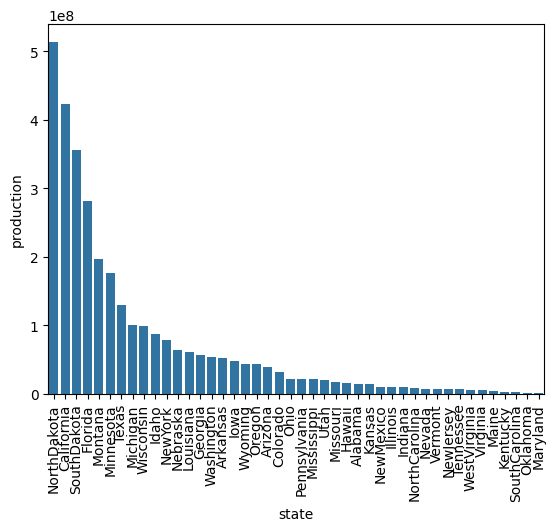

In [27]:
sns.barplot(data=new_df,x='state',y='production')
plt.xticks(rotation=90)
plt.show()

**Inference**:
NorthDakota,
California,
SouthDakota,
Florida,
Montana	these are top 5 honey producing states.

**Q3. What is the change in Mean average price of Honey from 1995 to 2021, Observe the trend.**

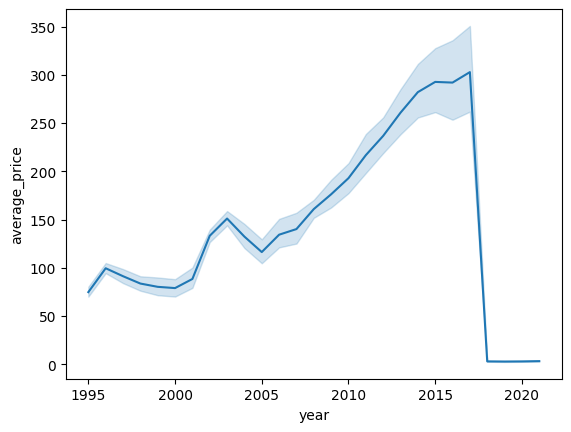

In [28]:
#With seaborn
sns.lineplot(data=df,x='year',y='average_price')
plt.show()

In [29]:
#Without seaborn
new_df = df.groupby('year')['average_price'].mean().reset_index()

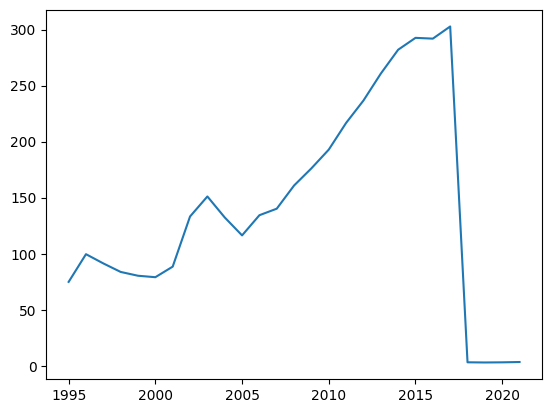

In [30]:
plt.plot(new_df['year'],new_df['average_price'])
plt.show()

**Inference**:
Honey prices are gradually increasing from 1995 to 2017.

Sudden decrease in the price in 2018 and then a constant price is observed after that.

**Q4. Which was the year when the production of honey in entire US was the highest?**

In [40]:
new_df = df.groupby('year')['production'].sum().reset_index()

In [41]:
new_df = new_df.sort_values(by='production',ascending=False)
new_df

,year,production
5,2000,220320000
3,1998,219321000
0,1995,210272000
4,1999,204585000
1,1996,197995000
2,1997,191176000
6,2001,185403000
9,2004,182379000
8,2003,180741000
10,2005,173857000


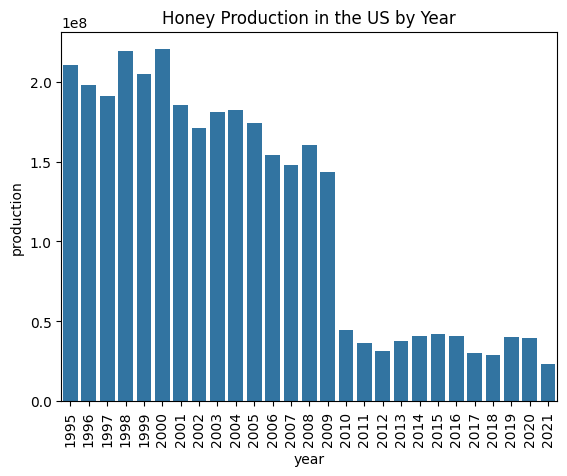

In [42]:
sns.barplot(data=new_df,x='year',y='production')
plt.title('Honey Production in the US by Year')
plt.xticks(rotation=90)
plt.show()

**Inference**:
2000 was the year when the production of honey in entire US was the highest. The total production in the year 2000 was 220320000

**Q5. From the above inference we get the production was highest in the year 2000. Now let's infer which state was having highest contribution in that year?**

In [43]:
new_df = df[df['year']==2000]

In [45]:
new_df = new_df.sort_values(by='production',ascending=False)

In [46]:
new_df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
245,NorthDakota,290000,115,33350000,13340000,56.0,18676000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
250,SouthDakota,235000,121,28435000,12796000,57.0,16208000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
235,Minnesota,150000,90,13500000,3105000,57.0,7695000,2000
238,Montana,148000,86,12728000,5982000,59.0,7510000,2000
252,Texas,105000,79,8295000,2986000,57.0,4728000,2000
258,Wisconsin,84000,90,7560000,4385000,68.0,5141000,2000
234,Michigan,72000,75,5400000,2970000,60.0,3240000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000


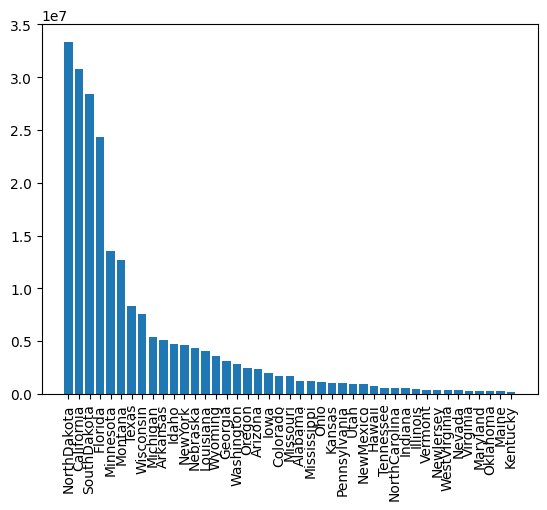

In [47]:
plt.bar(new_df['state'],new_df['production'])
plt.xticks(rotation=90)
plt.show()

**Inference**:
North Dakota state was having highest contribution in that year.

**Q6. Which states are having the highest number of colonies in the year 2010?**

In [65]:
new_df = df[df['year'] == 2010]

In [67]:
new_df = new_df[['state', 'colonies_number']]
new_df = new_df.sort_values(by='colonies_number',ascending=False)
new_df = new_df.reset_index(drop=True)
new_df

,state,colonies_number
0,NorthDakota,510000
1,California,410000
2,SouthDakota,265000
3,Florida,200000
4,Montana,157000
5,Minnesota,128000
6,Texas,100000
7,Idaho,97000
8,Michigan,71000
9,Washington,71000


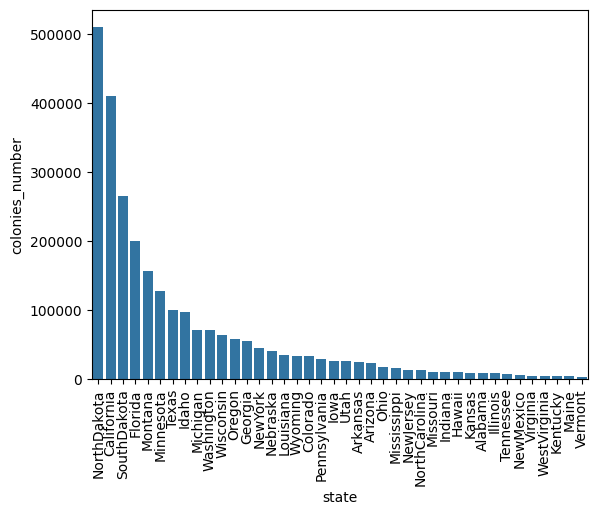

In [72]:
sns.barplot(data=new_df,x='state',y='colonies_number')
plt.xticks(rotation=90)
plt.show()

**Inference**:

NorthDakota - 510000,
California - 410000,
SouthDakota - 265000,
Florida - 200000,
Montana - 157000,
Minnesota - 128000,
Texas - 100000 these states are having the highest number of colonies in the year 2010.

**Conclusion**:

### Final Conclusion from the Honey Production Analysis:

1. **States with Least Contribution to Honey Production**:  
   Over the past 27 years, states like **New Mexico, Nevada, South Carolina, Oklahoma,** and **Maryland** have consistently contributed the least to honey production.

2. **Top 5 Honey-Producing States**:  
   The top 5 states that have been leading honey production since 1995 are:  
   - **North Dakota**  
   - **California**  
   - **South Dakota**  
   - **Florida**  
   - **Montana**  
   These states have consistently produced the highest amounts of honey.

3. **Change in Honey Price (1995 to 2021)**:  
   The price of honey has steadily increased from 1995 to 2017. However, in 2018, there was a sudden drop in the price, after which it stabilized and remained constant.

4. **Year with Highest Total Honey Production**:  
   The year **2000** marked the peak of honey production in the U.S., with the total production reaching **220,320,000**.

5. **State with Highest Contribution in 2000**:  
   In the year 2000, **North Dakota** was the state contributing the most to the total honey production.

6. **States with the Highest Number of Colonies in 2010**:  
   The states with the highest number of honeybee colonies in 2010 were:  
   - **North Dakota**: 510,000 colonies  
   - **California**: 410,000 colonies  
   - **South Dakota**: 265,000 colonies  
   - **Florida**: 200,000 colonies  
   - **Montana**: 157,000 colonies  
   - **Minnesota**: 128,000 colonies  
   - **Texas**: 100,000 colonies  